<a href="https://colab.research.google.com/github/sheldondsouza/Imageclassifier/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install torch torchvision torchsummary numpy matplotlib


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
device=torch.device("cpu")
if torch.cuda.is_available():
    device=torch.device("cuda")
elif torch.backends.mps.is_built() and torch.backends.mps.is_available():
     device=torch.device("mps")
print(device)

cuda


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4,
                                         shuffle=False, num_workers=2)
classes =('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')


100%|██████████| 170M/170M [00:03<00:00, 48.3MB/s]


In [ ]:
print('Number of images in the training dataset:', len(train_set))
print('Number of images in the testing dataset:', len(test_set))


Number of images in the training dataset: 50000
Number of images in the testing dataset: 10000


In [ ]:
print(f"Shape of the images in the training dataset: {train_loader.dataset[0][0].shape}")


Shape of the images in the training dataset: torch.Size([3, 32, 32])


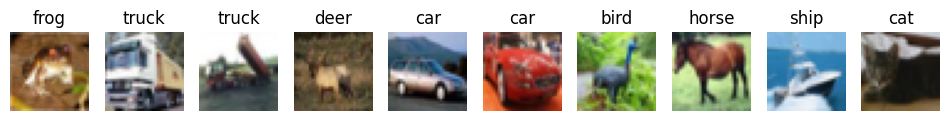

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for i in range(10):
    image = train_loader.dataset[i][0].permute(1, 2, 0)
    denormalized_image= image / 2 + 0.5
    axes[i].imshow(denormalized_image)
    axes[i].set_title(classes[train_loader.dataset[i][1]])
    axes[i].axis('off')
plt.show()

In [ ]:
class ConvNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 64, 3)
        self.conv2 = nn.Conv2d(64, 128, 3)

        self.pool = nn.MaxPool2d(2, stride=2)

        self.fc1 = nn.Linear(128 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x


net = ConvNeuralNet()
net.to(device)

ConvNeuralNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4608, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,792
         MaxPool2d-2           [-1, 64, 15, 15]               0
            Conv2d-3          [-1, 128, 13, 13]          73,856
         MaxPool2d-4            [-1, 128, 6, 6]               0
            Linear-5                  [-1, 120]         553,080
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 639,742
Trainable params: 639,742
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.75
Params size (MB): 2.44
Estimated Total Size (MB): 3.20
----------------------------------------------------------------


In [ ]:
loss_function = nn.NLLLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 10
for epoch in range(epochs):

    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}/{epochs}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1/10,  2000] loss: 1.798
[1/10,  4000] loss: 1.511
[1/10,  6000] loss: 1.414
[1/10,  8000] loss: 1.323
[1/10, 10000] loss: 1.261
[1/10, 12000] loss: 1.248
[2/10,  2000] loss: 1.145
[2/10,  4000] loss: 1.157
[2/10,  6000] loss: 1.110
[2/10,  8000] loss: 1.107
[2/10, 10000] loss: 1.079
[2/10, 12000] loss: 1.063
[3/10,  2000] loss: 1.011
[3/10,  4000] loss: 0.984
[3/10,  6000] loss: 0.990
[3/10,  8000] loss: 0.972
[3/10, 10000] loss: 0.969
[3/10, 12000] loss: 0.984
[4/10,  2000] loss: 0.883
[4/10,  4000] loss: 0.899
[4/10,  6000] loss: 0.891
[4/10,  8000] loss: 0.924
[4/10, 10000] loss: 0.894
[4/10, 12000] loss: 0.903
[5/10,  2000] loss: 0.829
[5/10,  4000] loss: 0.846
[5/10,  6000] loss: 0.846
[5/10,  8000] loss: 0.832
[5/10, 10000] loss: 0.855
[5/10, 12000] loss: 0.836
[6/10,  2000] loss: 0.761
[6/10,  4000] loss: 0.771
[6/10,  6000] loss: 0.781
[6/10,  8000] loss: 0.809
[6/10, 10000] loss: 0.803
[6/10, 12000] loss: 0.811
[7/10,  2000] loss: 0.718
[7/10,  4000] loss: 0.729
[7/10,  6000

In [ ]:
def view_classification(image, probabilities):
    probabilities = probabilities.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)

    image = image.permute(1, 2, 0)
    denormalized_image= image / 2 + 0.5
    ax1.imshow(denormalized_image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(classes)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

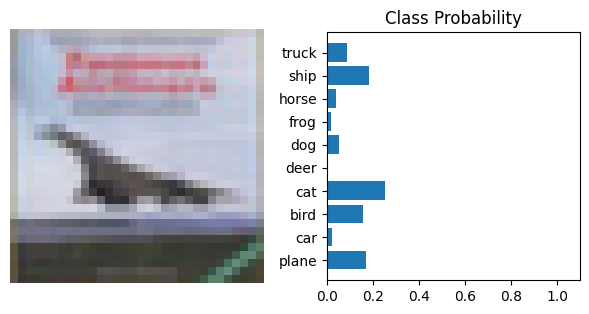

In [ ]:
images, _ = next(iter(test_loader))

image = images[3]
batched_image = image.unsqueeze(0).to(device)
with torch.no_grad():
    log_probabilities = net(batched_image)

probabilities = torch.exp(log_probabilities).squeeze().cpu()
view_classification(image, probabilities)

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)

        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %
